In [92]:
import pathlib
import zipfile
import os
import tensorflow as tf
from PIL import Image as Image
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import random
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [93]:
#Use extract function in Préparation de données to get correct dataset
#Need livrable2 zip in correct directory architecture
dataset_path = "../DatasetL2/Project_Dataset_Unzip/Dataset"

In [94]:
image_h = 75
image_w = 75
batch_s = 32

In [95]:
#def load_data(data_path, test_size=0.2):
#    train = []
#    test = []
#    for file in os.listdir(data_path):
#        random_number = random.random()
#        image = Image.open(data_path + "\\" + file)
#        pix = np.array(image.getdata()).reshape(image.size[0], image.size[1], 3)
#        if random_number < test_size :
#            test.append(pix)
#        else:
#            train.append(pix)
#    return train, test

#x_train, x_test = load_data(dataset_path)
#print(len(x_train))
#noise_factor = 0.5
#x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=len(x_train))

#x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=len(x_test))

#x_train_noisy = np.clip(x_train_noisy, 0., 1.)
#x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [96]:
print(len(os.listdir(dataset_path))-len(os.listdir(dataset_path))*0.2)

120.0


In [97]:
#print(x_train.__class__)
#print(len(x_train))
#print(x_test.__class__)
#print(x_train_noisy.__class__)
#print(x_train_noisy.shape)
#print(x_test_noisy.__class__)
#print(x_test_noisy.shape)

In [98]:
def add_noise(img):
    noise_factor = 0.9
    noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
    img = img + noise
    np.clip(img, 0., 1.)
    return img

def noisy(img):
      row,col,ch= img.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = img + gauss
      return noisy

test_dataset_path = "../DatasetL2/Project_Dataset_Unzip/"
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0,
        zoom_range=0,
        horizontal_flip=True,
        validation_split=0.20,
        data_format="channels_last",
        preprocessing_function=add_noise,
        )

train_generator = train_datagen.flow_from_directory(
        test_dataset_path,
        subset = 'training',
        target_size=(image_h, image_w),
        #batch_size=int(len(os.listdir(dataset_path))-len(os.listdir(dataset_path))*0.2),
        batch_size=8,
        class_mode="input",
        )
test_generator = train_datagen.flow_from_directory(
        test_dataset_path,
        subset = 'validation',
        target_size=(image_h, image_w),
        #batch_size=int(len(os.listdir(dataset_path))*0.2),
        batch_size=8,
        class_mode="input",
        )

Found 120 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


In [99]:
print(np.shape(train_generator.next()))
print(np.shape(train_generator.next()[0]))
print(np.shape(train_generator.next()[1]))
print(np.shape(test_generator.next()[0]))
print(np.shape(test_generator.next()[1]))

(2, 8, 75, 75, 3)
(8, 75, 75, 3)
(8, 75, 75, 3)
(8, 75, 75, 3)
(8, 75, 75, 3)


In [100]:
print(np.shape(add_noise(test_generator.next()[0][0])))

(75, 75, 3)


In [101]:
x_train = train_generator.next()[0]
x_train_noisy = train_generator.next()[1]
x_test = test_generator.next()[0]
x_test_noisy = test_generator.next()[1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


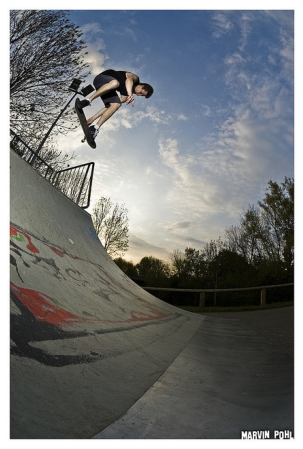

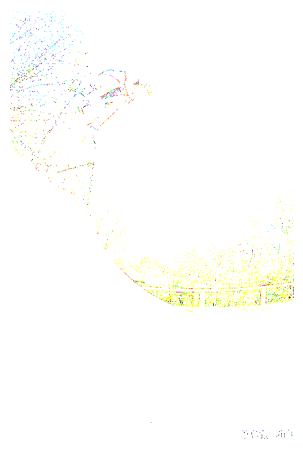

In [102]:
from keras.preprocessing import image
def display_single_image(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")

def display_image(X, n):
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1,n,i+1)
        plt.imshow(X[i].reshape(image_h, image_w,3))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

#Print 1 image for testing
img = image.load_img('../DatasetL2/Project_Dataset_Unzip/Dataset/noisy_139.jpg')  # this is a PIL image
display_single_image(img)
img = noisy(image.img_to_array(img))
display_single_image(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

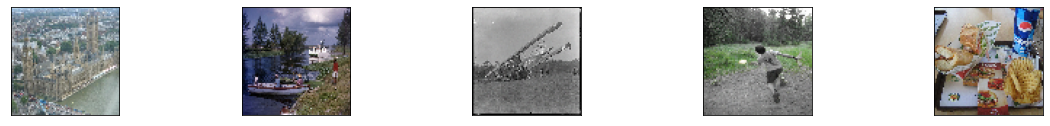

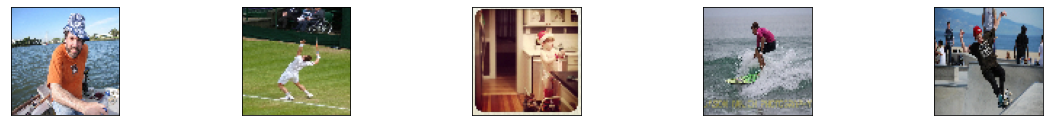

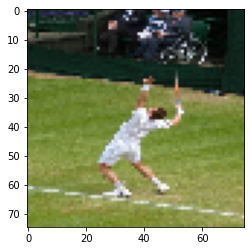

In [103]:
display_image(x_test,5)
display_image(x_test_noisy,5)
plt.imshow(x_test_noisy[1].reshape(75, 75,3))

In [104]:
input_img = keras.Input(shape=(image_h, image_w, 3))

encoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)

decoded = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
decoded = keras.layers.UpSampling2D((2, 2))(decoded)
decoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = keras.layers.UpSampling2D((2, 2))(decoded)
#decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

auto_encoder = keras.Model(input_img, decoded)
auto_encoder.compile(optimizer = 'adam',
                  loss = 'mean_absolute_error')
auto_encoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=batch_s,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
                )
auto_encoder.summary()

Epoch 1/10


ValueError: in user code:

    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\keras\engine\training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\keras\losses.py:1332 mean_absolute_error
        return backend.mean(tf.abs(y_pred - y_true), axis=-1)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\ops\math_ops.py:1383 binary_op_wrapper
        raise e
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\ops\math_ops.py:1367 binary_op_wrapper
        return func(x, y, name=name)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\ops\math_ops.py:548 subtract
        return gen_math_ops.sub(x, y, name)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10653 sub
        "Sub", x=x, y=y, name=name)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\framework\op_def_library.py:750 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\framework\func_graph.py:601 _create_op_internal
        compute_device)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\framework\ops.py:3569 _create_op_internal
        op_def=op_def)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\framework\ops.py:2042 __init__
        control_input_ops, op_def)
    d:\pycharmprojects\pythoninovproject\venv\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 76 and 75 for '{{node mean_absolute_error/sub}} = Sub[T=DT_FLOAT](model_2/up_sampling2d_5/resize/ResizeNearestNeighbor, IteratorGetNext:1)' with input shapes: [?,76,76,32], [?,75,75,3].


In [ ]:
tf.keras.utils.plot_model(auto_encoder, show_shapes=True)

In [ ]:
decoded_imgs = auto_encoder.predict(x_test_noisy, verbose=1)
print(decoded_imgs.shape)

In [ ]:
print(decoded_imgs[1].shape)

In [ ]:
display_image(decoded_imgs,10)